In [1]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


Еще одна полезная деталь интерфейса scikit-learn, о которой мы еще не говорили –это возможность  вычислить  оценки  неопределенности  прогнозов.  Часто  вас интересует  не  только класс,  спрогнозированный  моделью  для  определенной  точки  тестового  набора,  но  и  степень уверенности  модели  в  правильности  прогноза.

scikit-learn  существует  две  различные  функции,  с  помощью  которых  можно  оценить неопределенность прогнозов: decision_functionи predict_proba. 

In [2]:

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)


GradientBoostingClassifier(random_state=0)

In [3]:

print("Форма массива X_test: {}".format(X_test.shape))
print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6]))
print("Решающая функция с порогом отсечения:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))


Форма массива X_test: (25, 2)
Форма решающей функции: (25,)
Решающая функция:
[ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]
Решающая функция с порогом отсечения:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


Значение  показывает,  насколько  сильно  модель уверена  в  том,  что  точка  данных принадлежит  «положительному»  классу,  в  данном  случае,  классу  1.  Положительное  значение указывает  на  предпочтение  в  пользу  позиционного  класса,  а  отрицательное  значение –на предпочтение в пользу «отрицательного» (другого) класса.

In [ ]:

greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred идентичен прогнозам: {}".format(np.all(pred == gbrt.predict(X_test))))


Для бинарной классификации «отрицательный» класс –это всегда первый элемент атрибута classes_, а «положительный» класс –второй элемент атрибута classes_. Таким образом, если вы хотите  полностью  просмотреть  вывод  метода predict,  вам  нужно  воспользоваться атрибутом classes_

In [4]:

decision_function = gbrt.decision_function(X_test)
print("Решающая функция минимум: {:.2f} максимум: {:.2f}".format(np.min(decision_function), np.max(decision_function)))


Решающая функция минимум: -7.69 максимум: 4.29


Диапазон значений decision_functionможет быть произвольным и зависит от данных и параметров модели
Это   произвольное   масштабирование   часто   затрудняет   интерпретацию   вывода decision_function

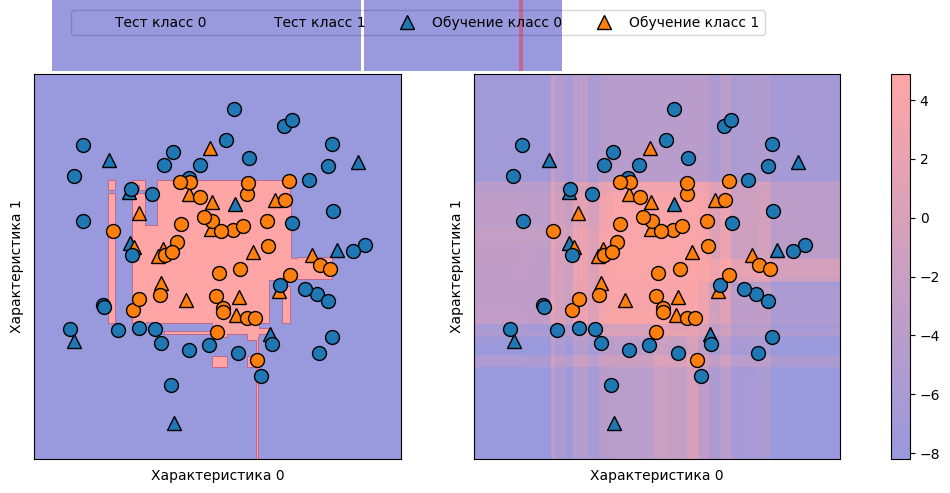

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Тест класс 0", "Тест класс 1", "Обучение класс 0", "Обучение класс 1"], ncol=4, loc=(.1, 1.1))
plt.show()


In [6]:

print("Форма вероятностей: {}".format(gbrt.predict_proba(X_test).shape))
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test[:6])))


Форма вероятностей: (25, 2)
Спрогнозированные вероятности:
[[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


Вывод метода predict_proba–это вероятность каждого класса и часто его легче понять, чем вывод метода decision_function. Для бинарной классификации он имеет форму (n_samples,2)

Первый элемент строки –это оценка вероятности первого класса, а второй элемент строки –это оценка вероятности второго класса. Поскольку речь идет о вероятности, то значения в выводе predict_proba всегда находятся в диапазоне между 0 и 1, а сумма значенийдля обоих классов всегда равна 1:

Модель  называется калиброванной (calibrated),есливычисленнаянеопределенностьсоответствуетфактической: в калиброванной модели прогноз, полученный с 70%-ной определенностью, будет правильным в 70% случаев

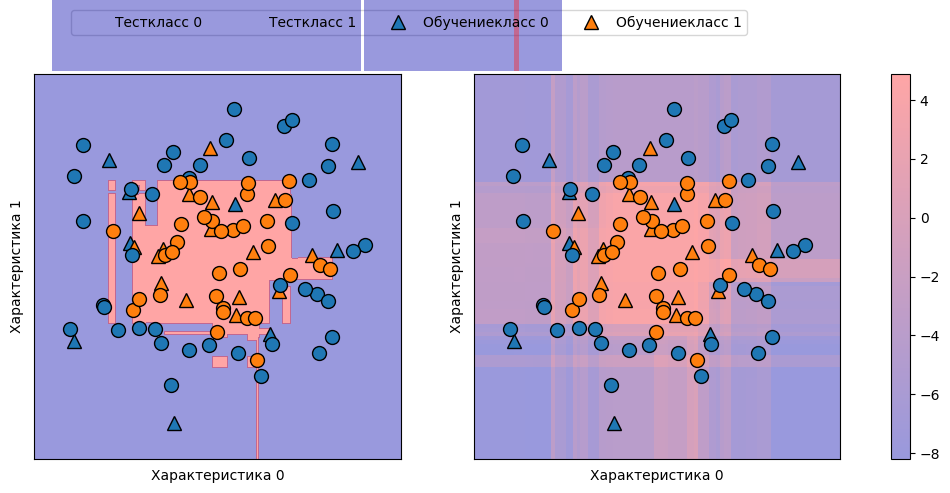

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Тесткласс 0", "Тесткласс 1", "Обучениекласс 0", "Обучениекласс 1"], ncol=4, loc=(.1, 1.1))
plt.show()


In [9]:

from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [10]:

print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6, :]))
print("Argmax решающей функции:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("Суммы: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))
print("Argmax спрогнозированных вероятностей:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))


Форма решающей функции: (38, 3)
Решающая функция:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]
Argmax решающей функции:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Спрогнозированные вероятности:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Суммы: [1. 1. 1. 1. 1. 1.]
Argmax спрогнозированных вероятностей:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


В мультиклассовой классификации decision_functionимеет форму (n_samples, n_classes) и каждый столбец показывает «оценку определенности» для каждого класса, где высокая оценка означает большую вероятность данного класса, а низкая оценка означает меньшую вероятность этого класса.

Подводя  итог,  отметим,  что predict_probaи decision_functionвсегдаимеют  форму (n_samples, n_classes),  за  исключением decision_functionв  случае  бинарной  классификации.  В бинарной  классификации decision_functionимеет  только  один  столбец,  соответствующий «положительному» классу classes_[1

Если вы хотитесравнить результаты, полученные с помощью predict, с результатами decision_functionили predict_proba, убедитесь, что используете атрибут classes_для получения фактических названий классов:

In [11]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print("Уникальные классы в обучающем наборе: {}".format(logreg.classes_))
print("Прогнозы: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("Argmax решающей функции: {}".format(argmax_dec_func[:10]))
print("Argmax объединенный с классами_: {}".format(logreg.classes_[argmax_dec_func][:10]))

Уникальные классы в обучающем наборе: ['setosa' 'versicolor' 'virginica']
Прогнозы: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Argmax решающей функции: [1 0 2 1 1 0 1 2 1 1]
Argmax объединенный с классами_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


Ближайшие соседи Подходит  для  небольших  наборов  данных,  хорош  в  качестве  базовоймодели,  прост  в объяснении.

Линейные модели Считается первым алгоритмом, который нужно попробовать, хорош для очень больших наборов данных, подходит для данных с очень высокой размерностью

Наивный байесовский классификатор Подходит только для классификации. Работает даже быстрее, чем линейные модели, хорош для очень больших наборов данных и высокоразмерных данных. Часто менее точен, чем линейные модели

Деревья решенийОчень  быстрый  метод,  не  нужно  масштабировать  данные,  результатыможно визуализировать и легко объяснить

Случайные леса Почти всегда работают лучше, чем одно дерево решений, очень устойчивый и мощный метод. Не нужно масштабировать данные. Плохо работает с данными очень высокой размерности и разреженными данными

Градиентный бустинг деревьев решенийКак  правило,  немного  более  точен,  чем  случайный  лес.  В  отличие  от  случайного  леса медленнее  обучается,  но  быстрее  предсказывает  и  требует  меньше  памяти.  По  сравнению  со случайным лесом требует настройки большего числа параметров.


Машины опорных векторов Мощный  метод  для  работы  снаборами  данных  среднего  размера  и  признаками, измеренными в едином масштабе. Требует масштабирования данных, чувствителен к изменению параметров.

Нейронные сети Можно  построить  очень  сложные  модели,  особенно  для  больших  наборов  данных. Чувствительны к масштабированию данных и выбору параметров. Большим моделям требуется много времени для обучения.